In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [ ]:
log = pd.read_csv('login.csv')


In [ ]:
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accesstoken = log['Key'][2]
accesstokenSecret =  log['Key'][3]

In [ ]:
#aunthetication object
auntheticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

auntheticate.set_access_token(accesstoken, accesstokenSecret)
#creating the API object
api = tweepy.API(auntheticate, wait_on_rate_limit = True)



In [ ]:
#Extract 100 tweets
posts = api.user_timeline(screen_name ="Cisco", count=100, lang = "en", tweet_mode="extended")

#print tweets
print("Show 5 recent tweets:\n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i += 1

Show 5 recent tweets:

1)Long-term changes are coming to corporate #cybersecurity policies and investments. Read why the rapid onset of remote work is forcing companies to address age-old security problems:  Via @sdxcentral

#NCSAM

2)How do you manage the new realities of patient care? Read how Cisco Capital has been helping healthcare organizations adapt in the face of change. https://t.co/U4nkjyJLnM

#HealthcareNow https://t.co/Kt83n3X943

3)What does the future hold? That’s the big question. We do know that we must be prepared – for tomorrow, next month, next year, and beyond. https://t.co/jeYMGHbImI

@CiscoCX #CiscoPS20 https://t.co/ssne7wE2sQ

4)🌎 While we implemented #AI in our devices some time ago, the world continues to evolve. 

😷 See how our devices have adapted masks in the #workplace: https://t.co/156YzjjUL7

5)RT @Stelow: News is coming... 2 days to go.... But before the curtain is raised at Partner Summit, here is @Tuszik, Cisco head of Channel t…



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Long-term changes are coming to corporate #cyb...
1,How do you manage the new realities of patient...
2,What does the future hold? That’s the big ques...
3,🌎 While we implemented #AI in our devices some...
4,RT @Stelow: News is coming... 2 days to go.......


In [ ]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '' ,text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanText)

df



,Tweets
0,Long-term changes are coming to corporate cybe...
1,How do you manage the new realities of patient...
2,What does the future hold? That’s the big ques...
3,🌎 While we implemented AI in our devices some ...
4,: News is coming... 2 days to go.... But befor...
...,...
95,_Knox Cheers
96,
97,Copy and paste but change what the bunny is ho...
98,The DigitalDivide limits various communities' ...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity']   = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectity,Polarity
0,Long-term changes are coming to corporate cybe...,0.100000,-0.050000
1,How do you manage the new realities of patient...,0.454545,0.136364
2,What does the future hold? That’s the big ques...,0.056250,0.000000
3,🌎 While we implemented AI in our devices some ...,0.000000,0.000000
4,: News is coming... 2 days to go.... But befor...,0.000000,0.000000
...,...,...,...
95,_Knox Cheers,0.000000,0.000000
96,,0.000000,0.000000
97,Copy and paste but change what the bunny is ho...,0.000000,0.000000
98,The DigitalDivide limits various communities' ...,0.295000,0.035000


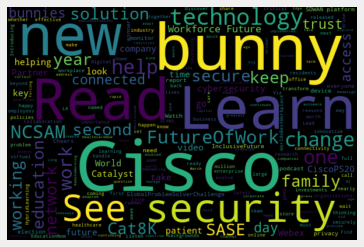

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width= 600, height = 400, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectity,Polarity,Analysis
0,Long-term changes are coming to corporate cybe...,0.100000,-0.050000,Negative
1,How do you manage the new realities of patient...,0.454545,0.136364,Positive
2,What does the future hold? That’s the big ques...,0.056250,0.000000,Neutral
3,🌎 While we implemented AI in our devices some ...,0.000000,0.000000,Neutral
4,: News is coming... 2 days to go.... But befor...,0.000000,0.000000,Neutral
...,...,...,...,...
95,_Knox Cheers,0.000000,0.000000,Neutral
96,,0.000000,0.000000,Neutral
97,Copy and paste but change what the bunny is ho...,0.000000,0.000000,Neutral
98,The DigitalDivide limits various communities' ...,0.295000,0.035000,Positive


In [ ]:
#print all negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j+=1

1)Long-term changes are coming to corporate cybersecurity policies and investments. Read why the rapid onset of remote work is forcing companies to address age-old security problems:  Via 

NCSAM

2)🎥 New video:  sat down with , COO of , to hear how nearly 140,000 employees transitioned from the office to working from home, in less than 10 days. All with no business interruption. 

FutureOfWork remotework



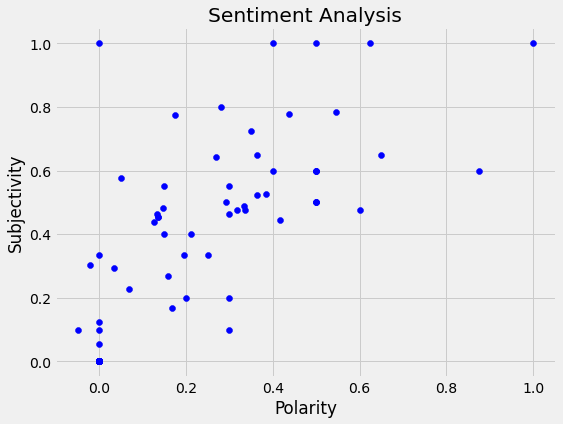

In [ ]:
#plot subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
pt = df[df.Analysis == 'Positive']
pt = pt['Tweets']
round( (pt.shape[0]/ df.shape[0]) * 100, 1)

48.0

In [ ]:
nt = df[df.Analysis == 'Negative']
nt = nt['Tweets']
round( (nt.shape[0]/ df.shape[0]) * 100, 1)

2.0

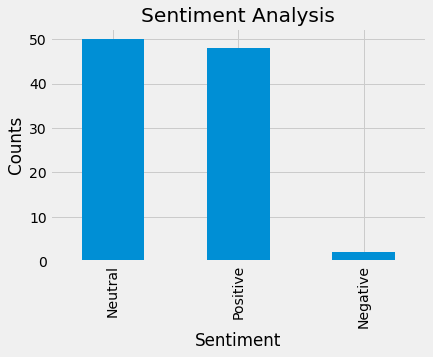

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()